**Load Dataset**

In [6]:
from keras.datasets import imdb

In [11]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 29s 2us/step


In [19]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


**One Hot Encode Input Data**

In [28]:
import numpy as np

In [32]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize training and test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Build Network**

In [59]:
# Creat stack of the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
# Configure loss function 
# and optimizer
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
# Create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [62]:
# Fit data to network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 268us/step - loss: 0.4913 - acc: 0.7979 - val_loss: 0.3863 - val_acc: 0.8640
Epoch 2/4
15000/15000 [==============================] - 2s 119us/step - loss: 0.3072 - acc: 0.9057 - val_loss: 0.3136 - val_acc: 0.8880
Epoch 3/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.2391 - acc: 0.9245 - val_loss: 0.2926 - val_acc: 0.8891
Epoch 4/4
15000/15000 [==============================] - 2s 103us/step - loss: 0.1973 - acc: 0.9385 - val_loss: 0.2771 - val_acc: 0.8905


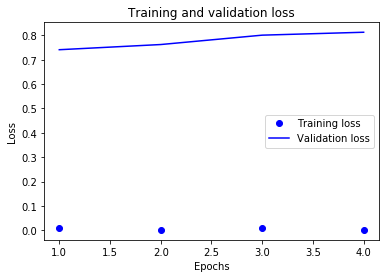

In [53]:
import matplotlib.pyplot as plt

# Access history of the fit session
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Number of epochs trained
epochs = range(1, len(history_dict['acc']) + 1)

# Plot losses
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

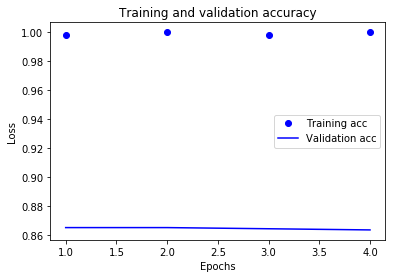

In [54]:
# Plot accuracy training
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

# Plot acc values for training and val
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# Evaluate trained model on the test set
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 117us/step


[0.2931651446723938, 0.88484]

In [64]:
model.predict(x_test)

array([[0.3247985 ],
       [0.99777883],
       [0.905377  ],
       ...,
       [0.12491392],
       [0.20770088],
       [0.54365164]], dtype=float32)